In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

from fastai.metrics import error_rate, accuracy
import gdown
from pathlib import Path

In [7]:
PATH_IMG = Path('PlantVillage/')

In [8]:
img_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),           
    get_items=get_image_files,                    
    splitter=GrandparentSplitter(train_name='train', valid_name='val'),  
    get_y=parent_label,                           
    item_tfms=Resize(224),                        
    batch_tfms=aug_transforms()                   
)
dls = img_data.dataloaders(PATH_IMG, bs=32)


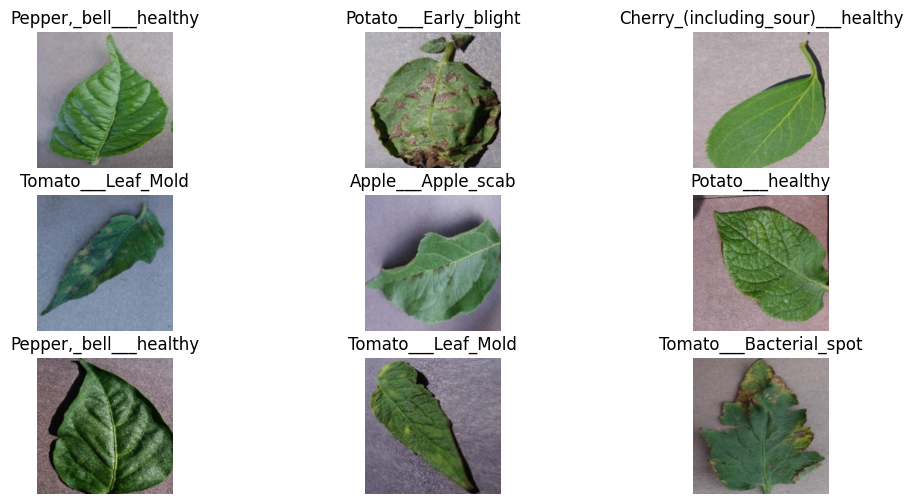

In [9]:
dls.show_batch(max_n=9, figsize=(12,6))


AttributeError: AxesImage.set() got an unexpected keyword argument 'rows'

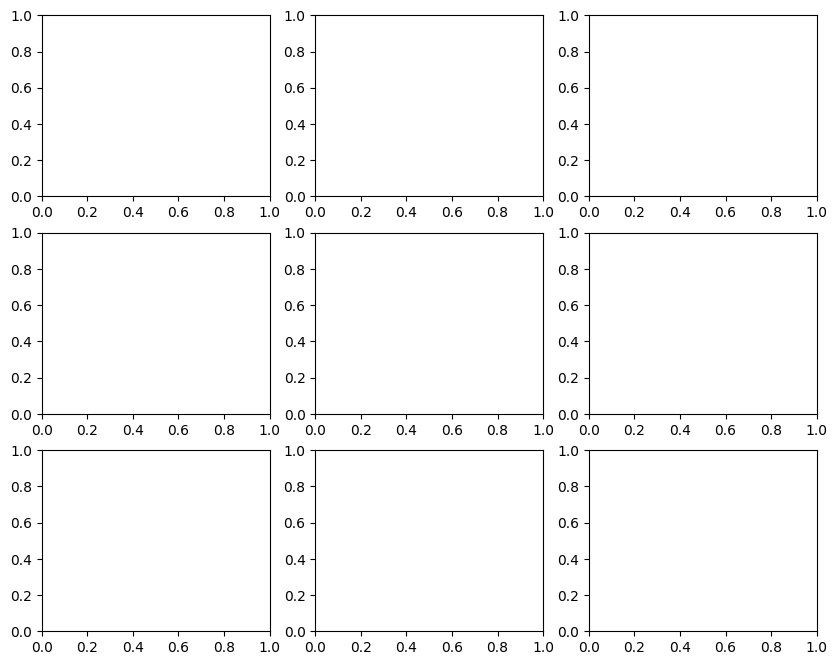

In [18]:
dls.show_batch(rows=3, figsize=(10,8))

In [19]:
dls.c

38

In [13]:
print(dls.vocab)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [14]:
model = vision_learner(dls, models.resnet34, metrics=[accuracy, error_rate])

In [9]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.215245,0.100298,0.967505,0.032495,3:08:06
1,0.100106,0.041424,0.985716,0.014284,3:04:58
2,0.065405,0.029204,0.990439,0.009561,3:10:36
3,0.046016,0.016879,0.994138,0.005862,3:21:37
4,0.033215,0.016416,0.994821,0.005179,3:10:02


In [32]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.067196,0.033519,0.989004,0.010996,03:27
1,0.041814,0.024897,0.992003,0.007997,03:28


In [10]:
model.save('train_5_cycles')

Path('models/train_5_cycles.pth')

In [11]:
interpret = ClassificationInterpretation.from_learner(model)

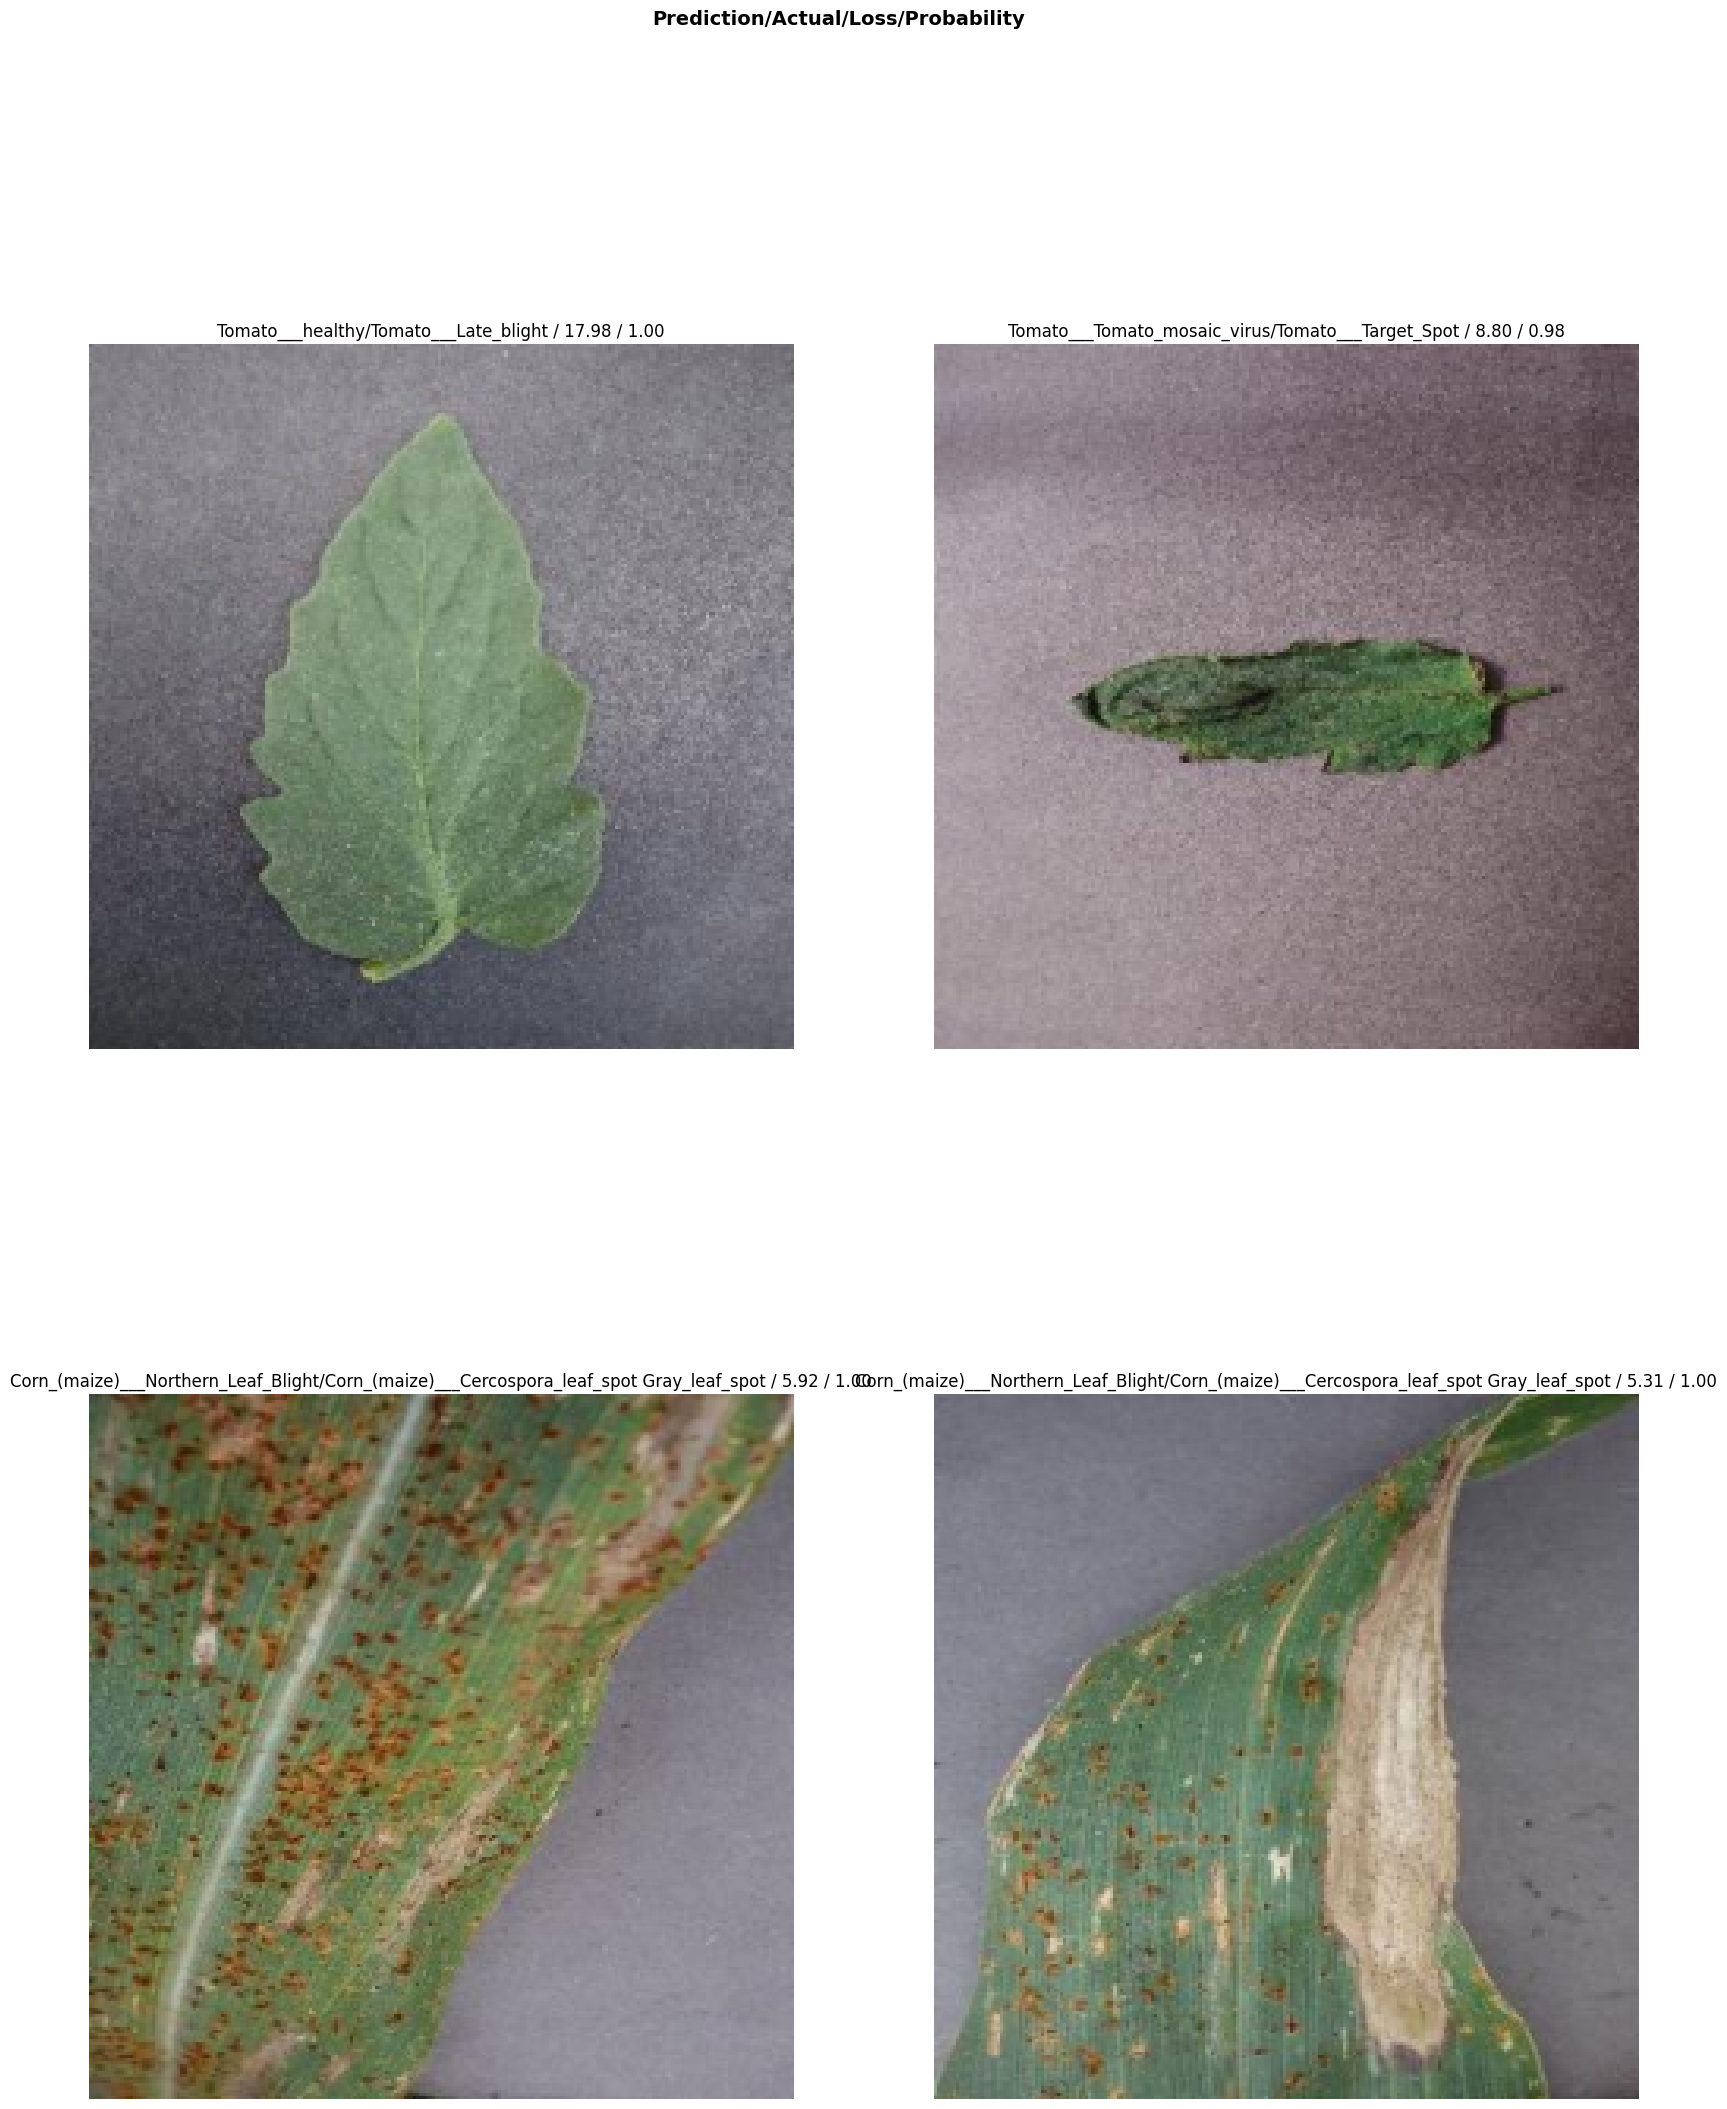

In [12]:
interpret.plot_top_losses(4, figsize=(20, 25))

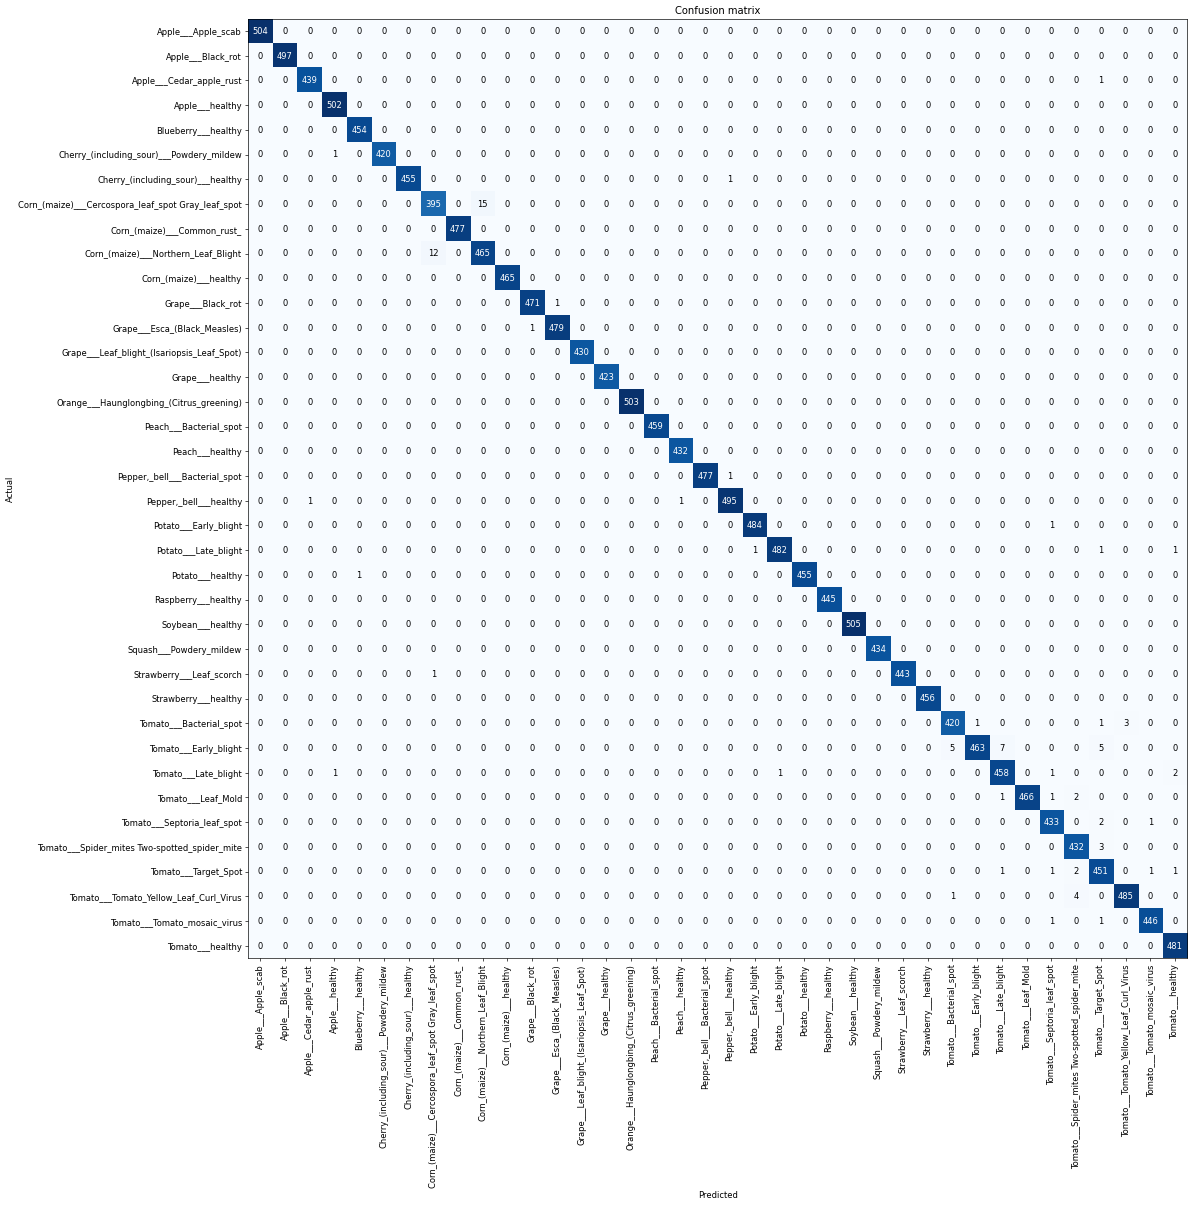

In [13]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [16]:
model.load('train_5_cycles')

In [41]:
model.unfreeze()
model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.347306,0.843974,0.800527,0.199473,04:36
1,0.131069,0.062115,0.978644,0.021356,04:37
2,0.038473,0.020997,0.993457,0.006543,04:37


In [43]:
model.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.124815,0.142209,0.957197,0.042803,04:37
1,0.144097,0.150233,0.959924,0.040076,04:37
2,0.093149,0.058316,0.981461,0.018539,04:36
3,0.041538,0.019202,0.995093,0.004907,04:36
4,0.018872,0.013773,0.996365,0.003635,04:36


In [44]:
model.save('train_lr_8_cycles')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


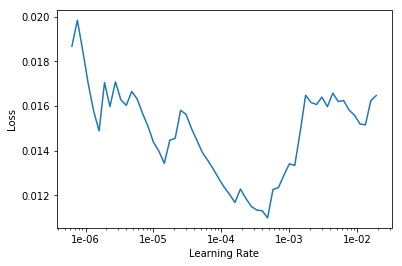

In [45]:
model.freeze()
model.lr_find()
model.recorder.plot()

In [47]:
lr = 1e-3/2
model.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.018528,0.014205,0.996274,0.003726,03:25
1,0.016184,0.013566,0.996547,0.003453,03:26


In [48]:
model.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.020793,0.013504,0.996092,0.003908,03:26
1,0.021284,0.013225,0.996547,0.003453,03:27
2,0.011413,0.013450,0.996547,0.003453,03:27


In [49]:
model.save('train_final5_cycles')

In [50]:
model.load('train_final5_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (44016 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: PlantVillage;

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: PlantVillage;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [15]:
model.export('export_5cycles_model.pkl')